<a href="https://colab.research.google.com/github/Sebastianwhc/Vision-Artificial/blob/main/Kernel%2C_Padding_y_Strides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel en acción

## Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage import io, color

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Image upload

In [ ]:
%cd 'Dirección de Colab donde está guardada la imagen '

In [ ]:
img = io.imread('./native.jpeg')
img_gray = color.rgb2gray(img)

In [ ]:
img_gray.shape

In [ ]:
plt.imshow(img_gray);

## Creating kernel - applying filters

In [ ]:
# Kernel para detectar bordes verticales.
kernel_1 = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

In [ ]:
# Kernel para detectar bordes horizontales.
kernel_2 = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [ 1,  1,  1]])

In [ ]:
# Kernel que muestra exactamente la misma imagen.
kernel_3 = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])

In [ ]:
# Kernel que transforma la imagen a toda en negro.
kernel_4 = np.array([[0, 0, 0],
                     [0, 0, 0],
                     [0, 0, 0]])

In [ ]:
# Kernel que resalta tanto bordes horizontales como verticales.
# También llamado filtro 'emboss' o 'relieve'.
kernel_5 = np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])

## Applying convolution

In [ ]:
# Aplicamos una conolución entre la imagen en escalas de grises y el kernel deterninado.
# Alicar todos los kernels anteriores a la imagen de ejemplo.
img_new = nd.convolve(img_gray, kernel_1)

In [ ]:
# Graficamos...
fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(img_gray, cmap=plt.cm.gray)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(img_new, cmap=plt.cm.gray)
axes[1].set_title('Convolution')
axes[1].axis('off');

# Padding

What you see in the animation below is the convolution of a 5x5 image with a 3x3 kernel, resulting in another 3x3 image.

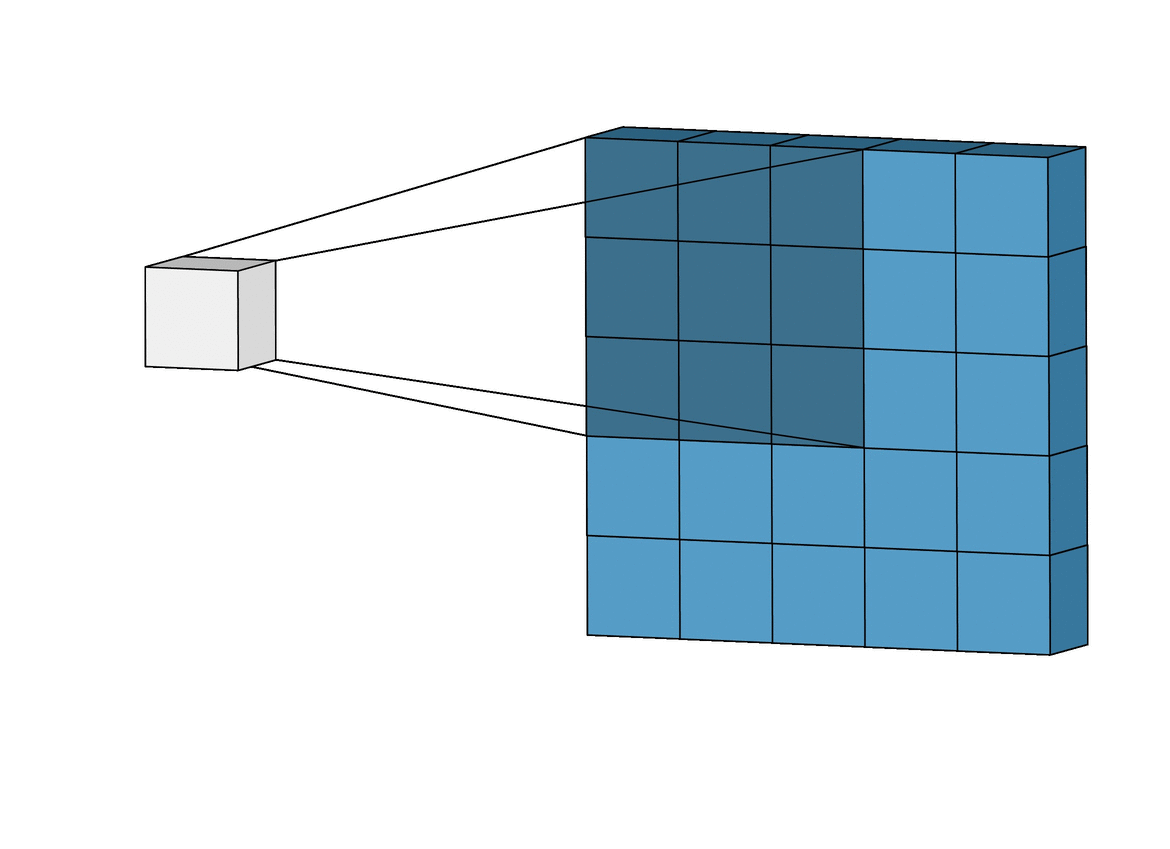

The problem is that the pixels at the different corners of the original image are only analyzed by the kernel once, while the pixels in the center are analyzed more than once by the kernel. This causes us to lose data that could be important. This is where the **padding** technique comes into play.

This technique consists of adding a border with values ​​equal to zero around the image obtained **after** the convolution, making the kernel go through these values ​​without losing the width or length of the original image.

*Why with zeros?* Because zeros are values ​​that will not alter the image or the characteristics that I can obtain in the convolution.

*How many zeros can I have around?* I can have *n* number of zero borders that I want around the image.

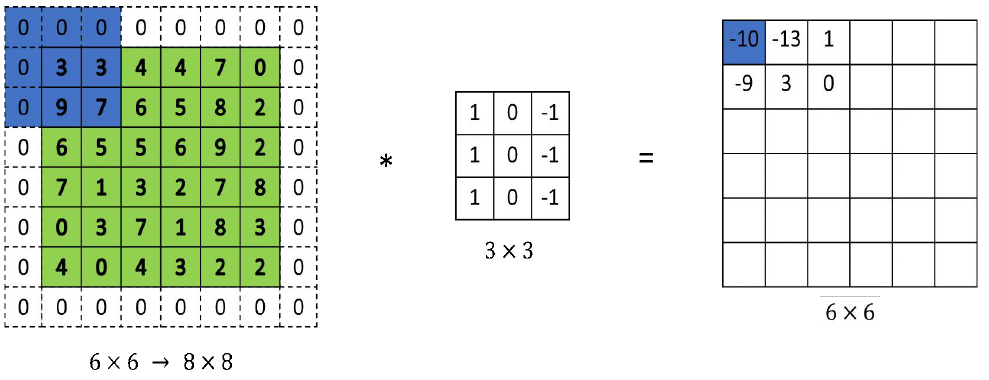

# Strides

Stride is a convolution technique that we can use to tell the kernel how we want it to traverse the input image.

In the animation below we can see a `stride=1`.

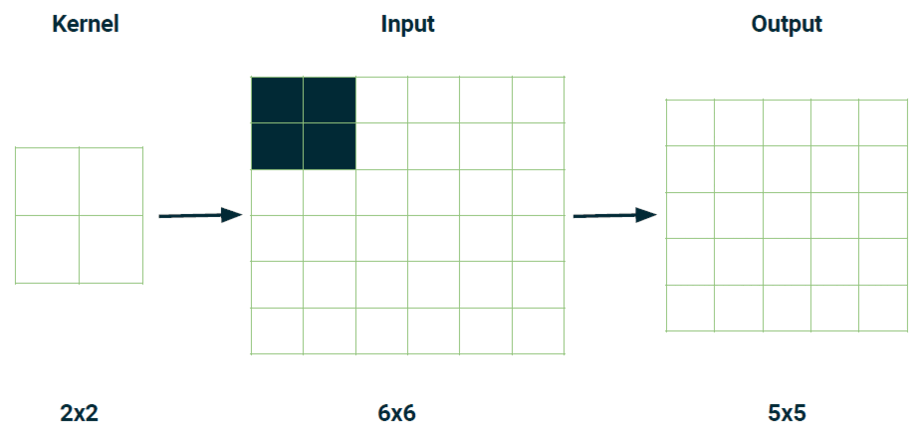

In the animation below we can see a `stride=2`.

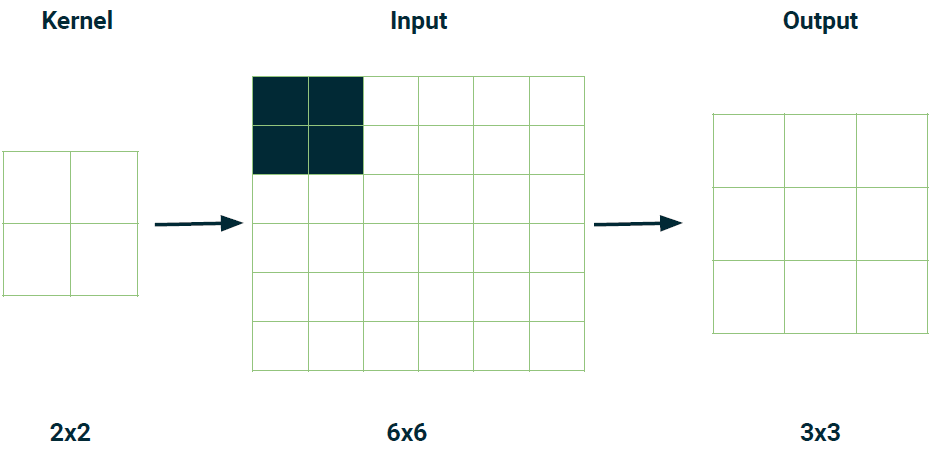

The Strides technique is important and functional in occasions when we need to optimize the code when we have a large number of images, so that the processing is done much faster and the feature extraction is much more global.

Although it is not widely used, it is a hyperparameter that we can use to compare and/or improve results.

*How is it used in the convolution layer?*

In [ ]:
## NO EJECUTAR: CÓDIGO DE MUESTRA ##
tf.keras.layers.Conv2D(filters,                   # Son todos los filtros que usaré en la convolución. Número entero.
                       kernel_size,               # El tamaño de los kernels en 2D y en tublas: (alto, ancho)
                       strides=(1, 1),            # Primer valor: cómo se desplaza horizontalmente;
                                                  # Segundo valor: cómo se desplaza verticalmente;
                       padding=["valid","same"])  # 'valid': no aplica el padding.
                                                  # 'same': se configura el padding para que la imagen de salida y de entrada sean iguales.

# Referencias

[1] [Image Kernels](https://setosa.io/ev/image-kernels/): Página interactiva para conocer y probar diferentes Kernels y saber cómo funcionan.